## The Atomic Simulation Environment, ASE

## Prerequisites

- For loops
- Matplotlib

In [ ]:
## Learning Outcomes

The Atomic Simulation Environment __[(ASE)](https://wiki.fysik.dtu.dk/ase/)__, is a python library containing tools to undertake, manipulate and analyse molecular simulations.

The ASE supports several external **calculators**, including LAMMPS, QuantumEspresso and Orca (amongst many others) and also contains a number of inbuilt calculators. A list of external and inbuilt calculators is __[here](https://wiki.fysik.dtu.dk/ase/ase/calculators/calculators.html)__.

### Atoms objects

At the core of the ASE, is the **Atoms object**. Every _calculator_ operates on an _Atoms object_.

An Atoms object is what we'd normally call a molecule. Makes sense right? A molecule is simply a list of atoms.

Before we start, take a look at the below acetone molecule:

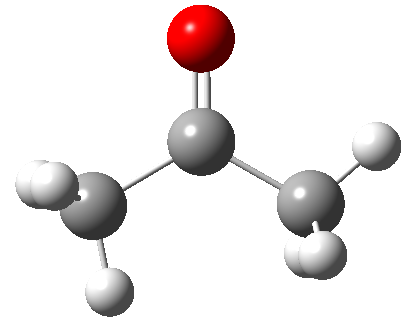

What information do I need to provide in order to distinguish each atom in the molecule? If you already have a background in molecular simulation, you may have already have some ideas from input files you have written.


Some further questions to help you think about your answer:
- It is fairly straightforward to distiguish the single oxygen atom:
    - Using **Atomic symbol / number**
-  The central carbon is different from the two methyl carbons:
    - Being bound to the electronegative oxygen atom, will cause the **partial charge** to be different
- While not shown, some atoms might be isotope labelled:
    - The **atomic mass** is therefore useful
- It is otherwise difficult to distinguish the two methyl carbon atoms or the six hydrogens (assuming the methyl groups rotate freely)
    - Therefore the **atom positions** are required to distinguish these atoms.

The ASE **Atom object** (for a single atom) provides the following information:

- Atomic Symbol / Number
- Position
- Mass
- Momentum
- Magnetic moment
- Charge
- Tag (that can be used for special purposes)


Let's dive in.

First import the Atoms class of the ASE:

In [ ]:
from ase import Atoms

Now let's make our first molecule (_ahem_ Atoms object), a simple CO molecule:

In [ ]:
d = 1.1
co = Atoms('CO', positions=[(0, 0, 0), (0, 0, d)])

The ASE also provides a variety of __[molecular viewers](https://wiki.fysik.dtu.dk/ase/ase/visualize/visualize.html)__, with different functionalities. For now, we'll use a simple but reliable viewer, that works directly in jupyter notebooks, called **x3d**:

In [ ]:
from ase.visualize import view
view(co, viewer='x3d')

In this simple viewer, we can use the mouse to rotate, zoom and translate the molecule within the viewer window.

Next we'll calculate the energy of our CO molecule. We will use the EMT calculator as it is quite fast and is implemented directly in ASE. To use a calculator, we need the following three steps:
1. Import the calculator
2. Setup the calculator
3. Attach the calculator to our Atoms object

In [ ]:
#1. Import
from ase.calculators.emt import EMT
#2. Setup calculator, EMT doesn't need any options, so we just need to define it
calc = EMT()
#3. Attach the calculator to our Atoms object
co.calc = calc

And now to calculate the energy of the molecule, we use the **get_potential_energy()** function:

In [ ]:
co.get_potential_energy()

Now let's manipulate our molecule, above we defined our bond length using the variable `d` to indicate our bond length. So we can easily change our bond length in a **for loop**.

To set the CO bond length directly, we can use the __[**set_distance()** function](https://wiki.fysik.dtu.dk/ase/ase/atoms.html#ase.Atoms.set_distance)__. The set_distance function requires, at a minimum, three arguments; the index of _atom0_, index of _atom2_ (because our Atoms object is mostly going to be bigger than diatomic), and the _distance_ we want to set.

In [ ]:
# Set up empty lists for distances and energies
distances = []
energies = []

for distance in range(90,200): #loop variable must be an integer
    co.calc = calc
    co.set_distance(0, 1, distance * 0.01)
    distances.append(distance * 0.01)
    energies.append(co.get_total_energy())


We can use **matplotlib** to plot our results:

In [ ]:
import matplotlib.pyplot as plt

ax = plt.gca()
ax.plot(distances, energies)
ax.set_xlabel('Distance [Å]')
ax.set_ylabel('Total energy [eV]')
plt.show()

From our plot above, we can largely tell the equilibrium CO distance. We can also extract the minimum distance from the lists we created:

In [ ]:
print("Minimum energy =", min(energies))

print("Equilibrium bond length =", distances[energies.index(min(energies))])


## Getting and Setting

We've just discovered two functions, `set_distance()` and `get_potential_energy()`. **get**ting and **set**ting are general concepts, with a fairly straighforward meaning:
 - **get** will interrogate the Atoms object and return a value
 - **set** will change the value in the Atoms object
Most things can be both **get**ted and **set**ted

Common get functions include:
 - get_distance(), get_angle(), get_dihedral()
 - get_chemical_formula()
 - get_dipole_moment()

Common set functions include:
 - set_distance(), set_angle(), set_dihedral()
 - set_chemical_formula()
 - set_cell() (for periodic systems)

A complete list is in the __[Atoms object documentation](https://wiki.fysik.dtu.dk/ase/ase/atoms.html)__

## Reading and writing molecule files

We've just made our own CO Atoms object here, but for something more complicated, ASE has its own methods to both read and write many __[common molecule formats](https://wiki.fysik.dtu.dk/ase/ase/io/io.html)__.

As always, we import:


In [ ]:
from ase.io import read, write

Then to read a molecule, we simply specify the filename, ASE uses the file extension to automatically determine the format of the file.

In [ ]:
ethane = read("ethane.xyz")

And to write, we similarly provide a filename, and ASE will use the extension we provide in order to determine the correct file format.
The write function takes two arguments:
`write(filename, Atoms_object)`

In [ ]:
ethane_new = 'ethane_new.xyz'
write(ethane_new, ethane)


In [ ]:
# TODO
# more examples